## Code to analyse the demogrphic details of the feedback 

In [1]:
### Load all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
# add the aeroport font for the plots

import matplotlib.font_manager as fm

font_path = '/Users/johanna/Downloads/Aeroport.ttf'  # the location of the font file
my_font = fm.FontProperties(fname=font_path)  # get the font based on the font_path

In [3]:
# define where plots are saved
folder_figures_save='/Users/johanna/Library/CloudStorage/GoogleDrive-johanna@limbic.ai/Shared drives/05_Research/Publications (research papers)/Clinical/Increased_Access/Figures/'


### Clean and group the qualitative feedback theme labels for analysis between demographic groups

In [4]:
## load the dataset of all feedback with labels

# this is not made available due to privacy and consent of the participants!

In [5]:
# remove rows that have less than 10 characters

print('number of datapoints before cleaning:', len(df))


df = df[df['feedback'].apply(lambda x: len(x) > 9)] 

print('number of datapoints after cleaning:', len(df))

number of datapoints before cleaning: 46165
number of datapoints after cleaning: 42332


In [6]:
# Define shorter theme names for each theme

feedback_map = {'Help at the time of need that was given fast and easy to use': 'Convenient',
               'A hopeful first-step to care that was thoughtfully designed': 'Provided hope',
               'A friendly companion that removes anxiety of talking to humans': 'Human-free',
               'Provided a self realisation of their current situation': 'Self-realisation',
               'As they needed to talk about specific illnesses or other mental disorders': 'Needed specific support',
               'neutral undefined': 'Other neutral feedback',
               'As they expected to start therapy faster': 'Expected support sooner',
                'They felt that they were in crisis and needed immediate attention.': 'Wanted urgent support',
                'negative undefined': 'Other negative feedback'
               }

df['label_name'] = df['label_name'].map(feedback_map)

In [7]:
# Counts of feedbacks for each theme
df['label_name'].value_counts()

Convenient                 24621
Provided hope               5896
Human-free                  3851
Self-realisation            3280
Needed specific support     1695
Other neutral feedback      1315
Expected support sooner      858
Wanted urgent support        508
Other negative feedback      308
Name: label_name, dtype: int64

In [56]:
print('positive feedback %',round(((24621+5896+3851+3280)/42332)*100,1))
print('neutral feedback %',round(((1695+1315)/42332)*100,1))
print('negative feedback %',round(((858+508+308)/42332)*100,1))

positive feedback % 88.9
neutral feedback % 7.1
negative feedback % 4.0


In [9]:
# group together the ethnicity labels

ethnicity_map = {
    'WHITE_BRITISH': 'WHITE',
    'ASIAN_BRITISH_INDIAN': 'ASIAN',
    'MIXED_OTHER': 'MIXED',
    'WHITE_OTHER': 'WHITE',
    'OTHER': 'OTHER',
    'BLACK_BRITISH_CARIBBEAN': 'BLACK',
    'NOT_ANSWERED': 'NOT_ANSWERED/UNKNOWN',
    'MIXED_WHITE_BLACK_CARIBBEAN': 'MIXED',
    'WHITE_IRISH': 'WHITE',
    'MIXED_WHITE_ASIAN': 'MIXED',
    'BLACK_BRITISH_AFRICAN': 'BLACK',
    'BLACK_BRITISH_OTHER': 'BLACK',
    'ASIAN_BRITISH_OTHER': 'ASIAN',
    'ASIAN_BRITISH_BANGLADESHI': 'ASIAN',
    'MIXED_WHITE_BLACK_AFRICAN': 'MIXED',
    'ASIAN_BRITISH_PAKISTANI': 'ASIAN',
    'CHINESE': 'ASIAN',
    'UNKNOWN': 'NOT_ANSWERED/UNKNOWN',
    'MIXED_WHITE_BLACK': 'MIXED',
    'BLACK_OTHER': 'BLACK',
    'BLACK_AFRICAN': 'BLACK',
    'ASIAN_INDIAN': 'ASIAN',
    'ASIAN_OTHER': 'ASIAN',
    'BLACK_CARIBBEAN': 'BLACK',
    'ASIAN_PAKISTANI': 'ASIAN',
    'ASIAN_BANGLADESHI': 'ASIAN',
    'GYPSY': 'OTHER'
}

df['broad_ethnicity'] = df['ethnicity'].map(ethnicity_map)


# group together sexuality
sexuality_map = {
    'HETEROSEXUAL': 'HETEROSEXUAL',
    'BISEXUAL': 'BISEXUAL',
    'HOMOSEXUAL_MALE': 'HOMOSEXUAL',
    'UNSURE': 'OTHER',
    'HOMOSEXUAL_FEMALE': 'HOMOSEXUAL',
    'NOT_ANSWERED': 'NOT_ANSWERED/UNKNOWN',
    'ASEXUAL': 'OTHER',
    'UNKNOWN': 'NOT_ANSWERED/UNKNOWN',
    'HOMOSEXUAL': 'HOMOSEXUAL',
    np.nan: 'NOT_ANSWERED/UNKNOWN',
}

df['sexuality_grouped'] = df['sexuality'].map(sexuality_map)


#group gender
gender_map = {
    'FEMALE': 'FEMALE',
    'MALE': 'MALE',
    'NON_BINARY': 'NON_BINARY',
    'NOT_ANSWERED': 'NOT_ANSWERED/UNKNOWN',
    'UNKNOWN': 'NOT_ANSWERED/UNKNOWN',
    'TRANSGENDER': 'OTHER',
    'NOT_LISTED': 'OTHER',
    np.nan: 'NOT_ANSWERED/UNKNOWN'
}

df['gender_grouped'] = df['gender'].map(gender_map)


In [10]:
counts_ethnicity = df.groupby('broad_ethnicity')['label_name'].value_counts()
proportions_ethnicity = counts_ethnicity.groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index(name='proportion')

counts_gender = df.groupby('gender_grouped')['label_name'].value_counts()
proportions_gender = counts_gender.groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index(name='proportion')

counts_sexuality = df.groupby('sexuality_grouped')['label_name'].value_counts()
proportions_sexuality = counts_sexuality.groupby(level=0).apply(lambda x: x / float(x.sum())).reset_index(name='proportion')


In [12]:
counts_ethnicity

broad_ethnicity       label_name             
ASIAN                 Convenient                   934
                      Provided hope                221
                      Self-realisation             183
                      Human-free                   151
                      Needed specific support       86
                      Other neutral feedback        60
                      Expected support sooner       50
                      Wanted urgent support         22
                      Other negative feedback       13
BLACK                 Convenient                   409
                      Provided hope                101
                      Self-realisation              98
                      Human-free                    64
                      Needed specific support       47
                      Other neutral feedback        24
                      Expected support sooner       17
                      Wanted urgent support         14
                   

In [13]:
counts_gender

gender_grouped        label_name             
FEMALE                Convenient                 17022
                      Provided hope               3914
                      Human-free                  2641
                      Self-realisation            2177
                      Needed specific support     1129
                      Other neutral feedback       854
                      Expected support sooner      526
                      Wanted urgent support        312
                      Other negative feedback      209
MALE                  Convenient                  6926
                      Provided hope               1854
                      Human-free                  1050
                      Self-realisation             998
                      Needed specific support      495
                      Other neutral feedback       394
                      Expected support sooner      302
                      Wanted urgent support        172
                   

In [14]:
counts_sexuality

sexuality_grouped     label_name             
BISEXUAL              Convenient                  1621
                      Human-free                   369
                      Provided hope                306
                      Self-realisation             192
                      Needed specific support      162
                      Other neutral feedback        78
                      Expected support sooner       40
                      Wanted urgent support         27
                      Other negative feedback       16
HETEROSEXUAL          Convenient                 20110
                      Provided hope               4992
                      Human-free                  2980
                      Self-realisation            2691
                      Needed specific support     1257
                      Other neutral feedback      1021
                      Expected support sooner      679
                      Wanted urgent support        403
                   

## Plot Figure 4 and calculate the statistics

### Plot sexuality and run the stats

In [15]:
sexuality_3_map = {'BISEXUAL': 'Bisexual',
    'HOMOSEXUAL': 'EVERYTHiNG ELSE',
    'OTHER': 'EVERYTHiNG ELSE',
    'NOT_ANSWERED/UNKNOWN': 'EVERYTHiNG ELSE', 
    'HETEROSEXUAL': 'Heterosexual'
}

df['sexuality_grouped_3'] = df['sexuality_grouped'].map(sexuality_3_map)

In [16]:
for i in df['sexuality_grouped_3'].unique():
    print(i, ':', len(df[df['sexuality_grouped_3'] == i]))

Heterosexual : 34372
Bisexual : 2811
EVERYTHiNG ELSE : 4761
nan : 0


In [17]:
### create contingency table using total numbers, instead of proportions

counts_sexuality_3 = df.groupby('sexuality_grouped_3')['label_name'].value_counts()

proportions_sexuality_3 = counts_sexuality_3.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')


counts_sexuality_table = counts_sexuality_3.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_sexuality_counts = pd.crosstab(counts_sexuality_table['sexuality_grouped_3'], counts_sexuality_table['label_name'], values=counts_sexuality_table['count'], aggfunc='sum')

df_contingency_sexuality_counts = df_contingency_sexuality_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_sexuality_counts = df_contingency_sexuality_counts.reindex(order, axis="columns")

df_contingency_sexuality_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
sexuality_grouped_3,,,,,,,,,
Bisexual,1621,306,192,369,162,78,40,27,16
EVERYTHiNG ELSE,2684,554,365,452,254,197,133,73,49
Heterosexual,20110,4992,2691,2980,1257,1021,679,403,239


In [18]:
# Define a list of the minority ethnic groups to compare to white
minority = ['Bisexual']

# Define the column label for the reference group (white)
reference_group = 'Heterosexual'

# Create an empty DataFrame to store the results
results_sexuality = pd.DataFrame(columns=['feedback_type', 'sexuality', 'chi2_stat', 'p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_sexuality_counts.columns:
    # Loop through each minority ethnic group
    for sexuality in minority:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_sexuality_counts.loc[sexuality, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_sexuality_counts.loc[sexuality]) # total feedback from this group
        group2 = df_contingency_sexuality_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_sexuality_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, dof, _ = chi2_contingency(feedback)

         # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'sexuality': sexuality,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 27*p_value}, index=[0])
        results_sexuality = pd.concat([results_sexuality, new_results], ignore_index=True)



In [19]:
results_sexuality

,feedback_type,sexuality,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Bisexual,0.721813,0.39555,1.0,1.067984e+01
1,Provided hope,Bisexual,27.844873,0.0,1.0,3.548932e-06
2,Self-realisation,Bisexual,3.485589,0.061905,1.0,1.671444e+00
3,Human-free,Bisexual,62.445173,0.0,1.0,7.397095e-14
4,Needed specific support,Bisexual,30.827416,0.0,1.0,7.614681e-07
5,Other neutral feedback,Bisexual,0.281855,0.595488,1.0,1.607818e+01
6,Expected support sooner,Bisexual,3.896127,0.048398,1.0,1.306734e+00
7,Wanted urgent support,Bisexual,0.844239,0.358187,1.0,9.671058e+00
8,Other negative feedback,Bisexual,0.435975,0.509072,1.0,1.374493e+01


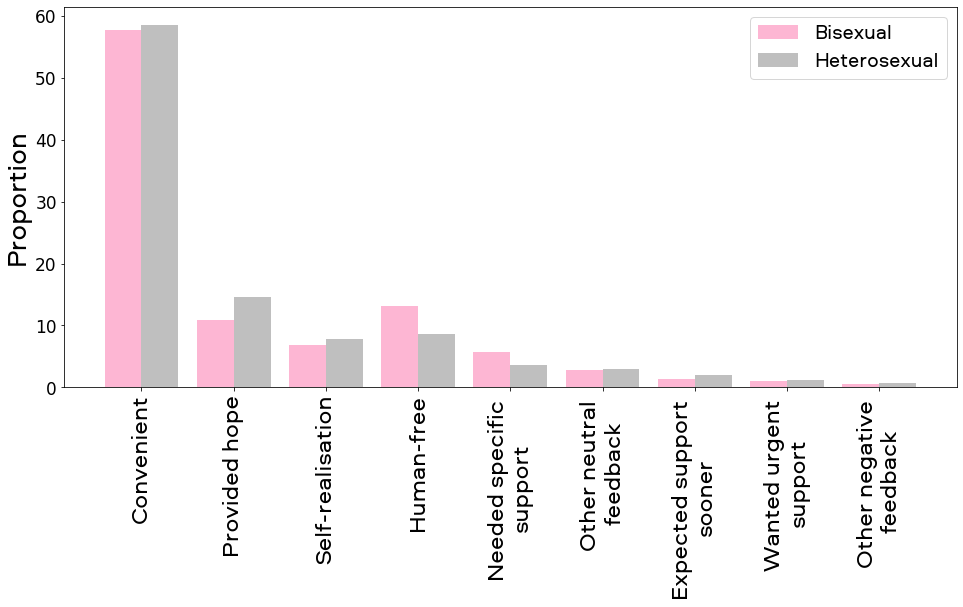

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# label names in the correct order
label_names = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_sexuality_3[proportions_sexuality_3['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('sexuality_grouped_3')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Bisexual']
    majority_value = grouped['Heterosexual']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

x_ticks = np.arange(len(label_names))
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Bisexual', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='Heterosexual', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)


# show the plot
plt.show()

#save the plot

image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_sexuality.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)


### Plot gender and run the stats

In [21]:
gender_3_map = {'MALE': 'Female & Male',
    'NON_BINARY': 'Other',
    'OTHER': 'Other',
    'NOT_ANSWERED/UNKNOWN': 'EVERYTHING ELSE', 
    'FEMALE': 'Female & Male'
}

df['gender_grouped_3'] = df['gender_grouped'].map(gender_3_map)

In [22]:
for i in df['gender_grouped_3'].unique():
    print(i, ':', len(df[df['gender_grouped_3'] == i]))

Female & Male : 41063
EVERYTHING ELSE : 456
Other : 813


In [23]:
### create contingency table using total numbers, instead of proportions

counts_gender_3 = df.groupby('gender_grouped_3')['label_name'].value_counts()

proportions_gender_3 = counts_gender_3.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')


counts_gender_table = counts_gender_3.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_gender_counts = pd.crosstab(counts_gender_table['gender_grouped_3'], counts_gender_table['label_name'], values=counts_gender_table['count'], aggfunc='sum')

df_contingency_gender_counts = df_contingency_gender_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_gender_counts = df_contingency_gender_counts.reindex(order, axis="columns")

df_contingency_gender_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
gender_grouped_3,,,,,,,,,
EVERYTHING ELSE,239,44,40,47,26,34,10,10,6
Female & Male,23948,5768,3175,3691,1624,1248,828,484,297
Other,434,84,65,113,45,33,20,14,5


In [24]:
# Define a list of the minority ethnic groups to compare to white
minority = ['Other']

# Define the column label for the reference group (white)
reference_group = 'Female & Male'

# Create an empty DataFrame to store the results
results_gender = pd.DataFrame(columns=['feedback_type', 'gender', 'chi2_stat', 'p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_gender_counts.columns:
    # Loop through each minority ethnic group
    for gender in minority:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_gender_counts.loc[gender, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_gender_counts.loc[gender]) # total feedback from this group
        group2 = df_contingency_gender_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_gender_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, dof, _ = chi2_contingency(feedback)

        # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'gender': gender,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 27*p_value}, index=[0])
        results_gender = pd.concat([results_gender, new_results], ignore_index=True)


In [25]:
results_gender

,feedback_type,gender,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Other,7.788927,0.005257,1.0,0.141932
1,Provided hope,Other,8.843921,0.002941,1.0,0.079398
2,Self-realisation,Other,0.044823,0.832329,1.0,22.472883
3,Human-free,Other,22.685504,0.000002,1.0,0.000052
4,Needed specific support,Other,4.79701,0.028509,1.0,0.769748
5,Other neutral feedback,Other,2.462579,0.116587,1.0,3.147854
6,Expected support sooner,Other,0.582955,0.445156,1.0,12.019221
7,Wanted urgent support,Other,1.567167,0.210619,1.0,5.686709
8,Other negative feedback,Other,0.023107,0.87918,1.0,23.737853


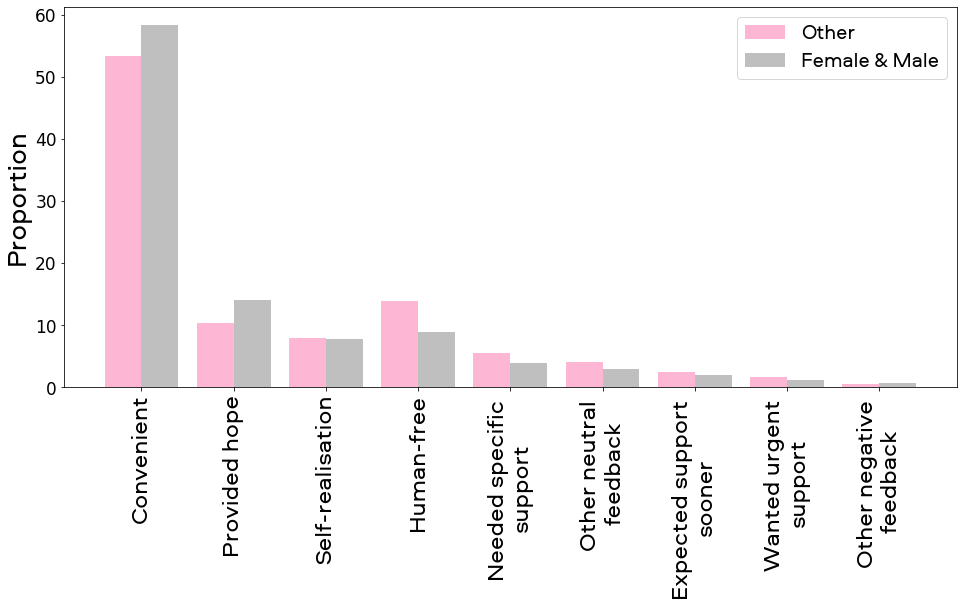

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# label names in the correct order
label_names = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_gender_3[proportions_gender_3['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('gender_grouped_3')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Other']
    majority_value = grouped['Female & Male']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

x_ticks = np.arange(len(label_names))
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Other', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='Female & Male', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)

# show the plot
plt.show()

#save the plot
image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_gender.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)


### Plot ethnicity and run the stats


In [28]:
ethnicity_2_map = {'WHITE': 'White',
    'ASIAN': 'Asian & Black Groups',
    'MIXED': 'EVERYTHING ELSE',
    'OTHER': 'EVERYTHING ELSE',
    'NOT_ANSWERED/UNKNOWN': 'EVERYTHING ELSE', 
    'BLACK': 'Asian & Black Groups'
}

df['ethnicity_grouped_2'] = df['broad_ethnicity'].map(ethnicity_2_map)


In [29]:
for i in df['ethnicity_grouped_2'].unique():
    print(i, ':', len(df[df['ethnicity_grouped_2'] == i]))

White : 37272
Asian & Black Groups : 2499
EVERYTHING ELSE : 1794
nan : 0


In [30]:
### create contingency table using total numbers, instead of proportions

counts_ethnicity_2 = df.groupby('ethnicity_grouped_2')['label_name'].value_counts()

proportions_ethnicity_2 = counts_ethnicity_2.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')


counts_ethnicity_table = counts_ethnicity_2.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_ethnicity_counts = pd.crosstab(counts_ethnicity_table['ethnicity_grouped_2'], counts_ethnicity_table['label_name'], values=counts_ethnicity_table['count'], aggfunc='sum')

df_contingency_ethnicity_counts = df_contingency_ethnicity_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_ethnicity_counts = df_contingency_ethnicity_counts.reindex(order, axis="columns")

df_contingency_ethnicity_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
ethnicity_grouped_2,,,,,,,,,
Asian & Black Groups,1343,322,281,215,133,84,67,36,18
EVERYTHING ELSE,961,210,148,155,120,103,47,31,19
White,21905,5253,2782,3416,1408,1106,709,428,265


In [31]:
# Define a list of the minority ethnic groups to compare to white
minority_ethnicities = ['Asian & Black Groups']

# Define the column label for the reference group (white)
reference_group = 'White'

# Create an empty DataFrame to store the results
results_ethnicity = pd.DataFrame(columns=['feedback_type', 'ethnicity', 'chi2_stat', 'p_value', 'dof','corrected_p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_ethnicity_counts.columns:
    # Loop through each minority ethnic group
    for ethnicity in minority_ethnicities:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_ethnicity_counts.loc[ethnicity, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_ethnicity_counts.loc[ethnicity]) # total feedback from this group
        group2 = df_contingency_ethnicity_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_ethnicity_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, dof, _ = chi2_contingency(feedback)

        # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'ethnicity': ethnicity,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 27*p_value}, index=[0])
        results_ethnicity = pd.concat([results_ethnicity, new_results], ignore_index=True)


In [32]:
results_ethnicity

,feedback_type,ethnicity,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Asian & Black Groups,24.184502,0.000001,1,0.000024
1,Provided hope,Asian & Black Groups,2.738627,0.097949,1,2.64462
2,Self-realisation,Asian & Black Groups,46.555989,0.0,1,0.0
3,Human-free,Asian & Black Groups,0.823979,0.364019,1,9.82852
4,Needed specific support,Asian & Black Groups,14.587835,0.000134,1,0.003612
5,Other neutral feedback,Asian & Black Groups,1.120282,0.289858,1,7.826157
6,Expected support sooner,Asian & Black Groups,7.024241,0.008041,1,0.217117
7,Wanted urgent support,Asian & Black Groups,1.490675,0.222112,1,5.997018
8,Other negative feedback,Asian & Black Groups,0.0,1.0,1,27.0


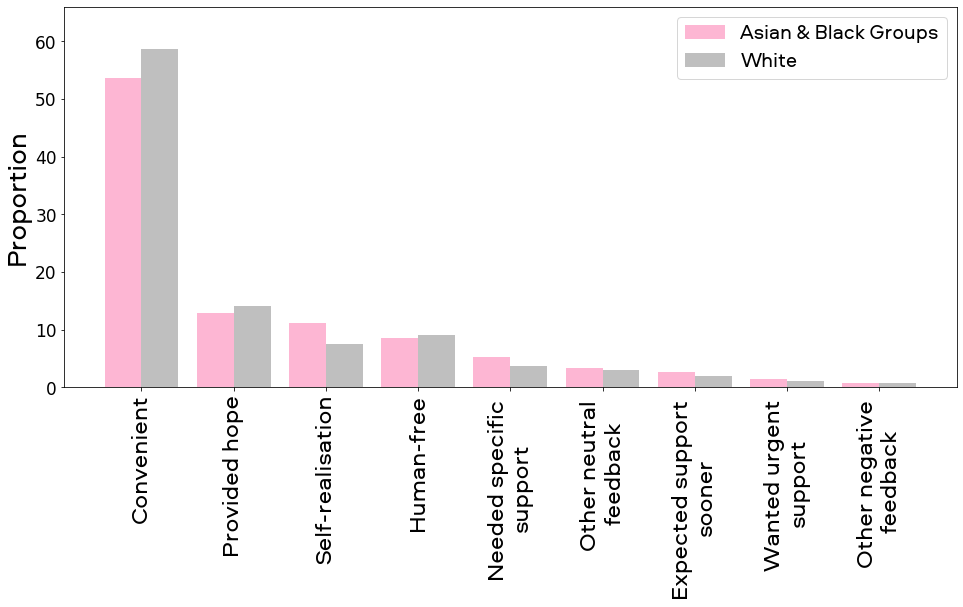

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# get the unique label names
label_names = proportions_ethnicity_2['label_name'].unique()

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_ethnicity_2[proportions_ethnicity_2['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('ethnicity_grouped_2')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Asian & Black Groups']
    majority_value = grouped['White']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

# create an array of x tick positions
x_ticks = np.arange(len(label_names))

# set the width of the bars
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Asian & Black Groups', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='White', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

plt.ylim(0,66)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)


# show the plot
plt.show()

#save the plot
image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_ethnicity.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)


## Supplementary figure 2 - all minority groups vs majority groups

In [34]:
### gender

gender_2_map = {'MALE': 'Female & Male',
    'NON_BINARY': 'Minority',
    'OTHER': 'Minority',
    'NOT_ANSWERED/UNKNOWN': 'Minority', 
    'FEMALE': 'Female & Male'
}

df['gender_grouped_2'] = df['gender_grouped'].map(gender_2_map)

In [35]:
### create contingency table using total numbers, instead of proportions

counts_gender_2 = df.groupby('gender_grouped_2')['label_name'].value_counts()

proportions_gender_2 = counts_gender_2.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')

counts_gender_table = counts_gender_2.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_gender_counts = pd.crosstab(counts_gender_table['gender_grouped_2'], counts_gender_table['label_name'], values=counts_gender_table['count'], aggfunc='sum')

df_contingency_gender_counts = df_contingency_gender_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_gender_counts = df_contingency_gender_counts.reindex(order, axis="columns")

df_contingency_gender_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
gender_grouped_2,,,,,,,,,
Female & Male,23948,5768,3175,3691,1624,1248,828,484,297
Minority,673,128,105,160,71,67,30,24,11


In [36]:
# Define a list of the minority ethnic groups to compare to white
minority_gender = ['Minority']

# Define the column label for the reference group (white)
reference_group = 'Female & Male'

# Create an empty DataFrame to store the results
results_gender = pd.DataFrame(columns=['feedback_type', 'gender', 'chi2_stat', 'p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_gender_counts.columns:
    # Loop through each minority ethnic group
    for gender in minority_gender:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_gender_counts.loc[gender, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_gender_counts.loc[gender]) # total feedback from this group
        group2 = df_contingency_gender_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_gender_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, _, _ = chi2_contingency(feedback)

       # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'gender': gender,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 27*p_value}, index=[0])
        results_gender = pd.concat([results_gender, new_results], ignore_index=True)


In [37]:
results_gender

,feedback_type,gender,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Minority,13.919673,0.000191,1.0,0.005151
1,Provided hope,Minority,15.773707,0.000071,1.0,0.001927
2,Self-realisation,Minority,0.433276,0.510386,1.0,13.780424
3,Human-free,Minority,19.068239,0.000013,1.0,0.000341
4,Needed specific support,Minority,8.192667,0.004206,1.0,0.113562
5,Other neutral feedback,Minority,19.792288,0.000009,1.0,0.000233
6,Expected support sooner,Minority,0.584373,0.444604,1.0,12.004295
7,Wanted urgent support,Minority,4.687869,0.030376,1.0,0.820160
8,Other negative feedback,Minority,0.180546,0.670904,1.0,18.114411


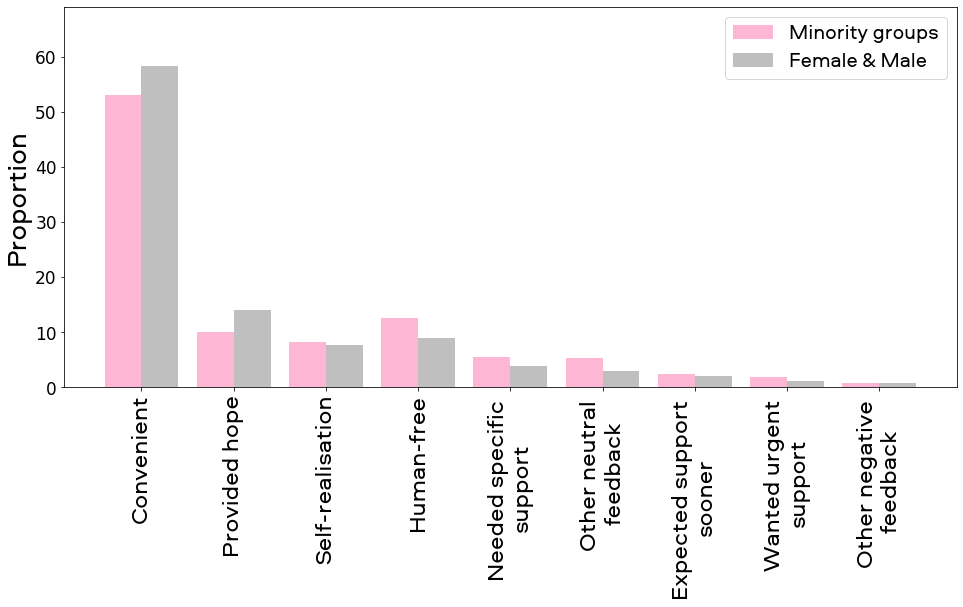

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# label names in the correct order
label_names = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_gender_2[proportions_gender_2['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('gender_grouped_2')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Minority']
    majority_value = grouped['Female & Male']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

x_ticks = np.arange(len(label_names))
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Minority groups', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='Female & Male', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)

plt.ylim(0,69)

# show the plot
plt.show()

#save the plot
image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_gender_supplement.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)


In [39]:
#### sexuality

sexuality_2_map = {'BISEXUAL': 'Minority groups',
    'HOMOSEXUAL': 'Minority groups',
    'OTHER': 'Minority groups',
    'NOT_ANSWERED/UNKNOWN': 'Minority groups', 
    'HETEROSEXUAL': 'Heterosexual'
}

df['sexuality_grouped_2'] = df['sexuality_grouped'].map(sexuality_2_map)

In [40]:
### create contingency table using total numbers, instead of proportions

counts_sexuality_2 = df.groupby('sexuality_grouped_2')['label_name'].value_counts()

proportions_sexuality_2 = counts_sexuality_2.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')


counts_sexuality_table = counts_sexuality_2.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_sexuality_counts = pd.crosstab(counts_sexuality_table['sexuality_grouped_2'], counts_sexuality_table['label_name'], values=counts_sexuality_table['count'], aggfunc='sum')

df_contingency_sexuality_counts = df_contingency_sexuality_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_sexuality_counts = df_contingency_sexuality_counts.reindex(order, axis="columns")

df_contingency_sexuality_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
sexuality_grouped_2,,,,,,,,,
Heterosexual,20110,4992,2691,2980,1257,1021,679,403,239
Minority groups,4305,860,557,821,416,275,173,100,65


In [41]:
# Define a list of the minority ethnic groups to compare to white
minority_sexuality = ['Minority groups']

# Define the column label for the reference group (white)
reference_group = 'Heterosexual'

# Create an empty DataFrame to store the results
results_sexuality = pd.DataFrame(columns=['feedback_type', 'sexuality', 'chi2_stat', 'p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_sexuality_counts.columns:
    # Loop through each minority ethnic group
    for sexuality in minority_sexuality:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_sexuality_counts.loc[sexuality, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_sexuality_counts.loc[sexuality]) # total feedback from this group
        group2 = df_contingency_sexuality_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_sexuality_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, _, _ = chi2_contingency(feedback)

        # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'sexuality': sexuality,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 27*p_value}, index=[0])
        results_sexuality = pd.concat([results_sexuality, new_results], ignore_index=True)


In [42]:
results_sexuality

,feedback_type,sexuality,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Minority groups,6.899651,0.008621,1.0,2.327739e-01
1,Provided hope,Minority groups,51.538013,0.0,1.0,1.896052e-11
2,Self-realisation,Minority groups,1.877576,0.17061,1.0,4.606466e+00
3,Human-free,Minority groups,35.282301,0.0,1.0,7.700730e-08
4,Needed specific support,Minority groups,54.192491,0.0,1.0,4.908066e-12
5,Other neutral feedback,Minority groups,8.844424,0.00294,1.0,7.937615e-02
6,Expected support sooner,Minority groups,2.829341,0.092556,1.0,2.499021e+00
7,Wanted urgent support,Minority groups,1.028386,0.310538,1.0,8.384525e+00
8,Other negative feedback,Minority groups,2.072799,0.149946,1.0,4.048545e+00


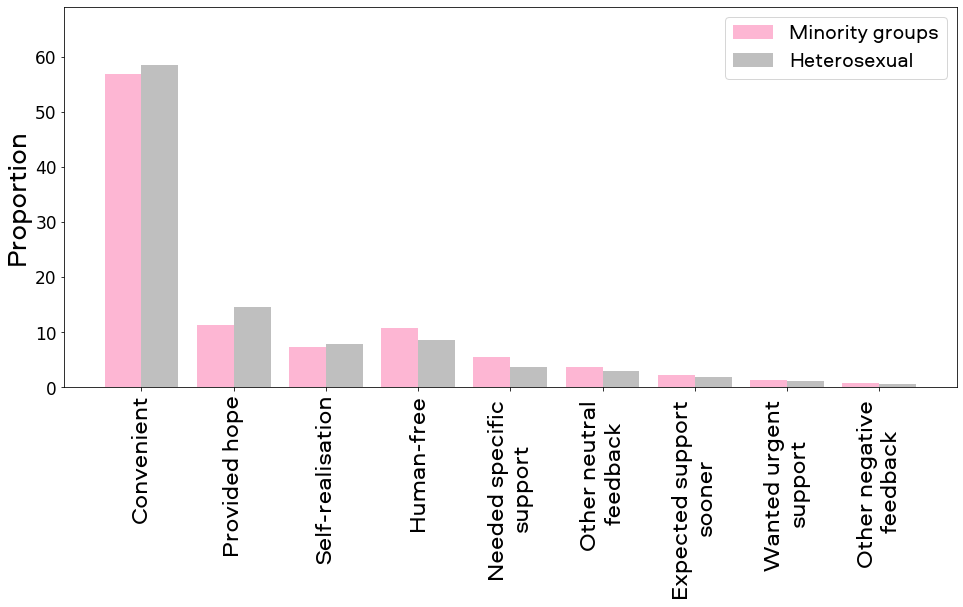

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# label names in the correct order
label_names = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_sexuality_2[proportions_sexuality_2['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('sexuality_grouped_2')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Minority groups']
    majority_value = grouped['Heterosexual']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

x_ticks = np.arange(len(label_names))
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Minority groups', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='Heterosexual', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)

plt.ylim(0,69)

# show the plot
plt.show()

#save the plot

image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_sexuality_supplement.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)


In [44]:
#### ethnicity

ethnicity_3_map = {'WHITE': 'White',
    'ASIAN': 'Minority groups',
    'MIXED': 'Minority groups',
    'OTHER': 'Minority groups',
    'NOT_ANSWERED/UNKNOWN': 'Minority groups', 
    'BLACK': 'Minority groups'
}

df['ethnicity_grouped_3'] = df['broad_ethnicity'].map(ethnicity_3_map)

In [45]:
### create contingency table using total numbers, instead of proportions

counts_ethnicity_2 = df.groupby('ethnicity_grouped_3')['label_name'].value_counts()
proportions_ethnicity_2 = counts_ethnicity_2.groupby(level=0).apply(lambda x: (x / float(x.sum())*100)).reset_index(name='proportion')


counts_ethnicity_table = counts_ethnicity_2.groupby(level=0).apply(lambda x: x).reset_index(name='count')

df_contingency_ethnicity_counts = pd.crosstab(counts_ethnicity_table['ethnicity_grouped_3'], counts_ethnicity_table['label_name'], values=counts_ethnicity_table['count'], aggfunc='sum')

df_contingency_ethnicity_counts = df_contingency_ethnicity_counts.fillna(0) # change nan's to zeros 

order = ['Convenient', 
        'Provided hope',
        'Self-realisation', 
        'Human-free',
        'Needed specific support',
        'Other neutral feedback',
        'Expected support sooner',
        'Wanted urgent support',
        'Other negative feedback']

df_contingency_ethnicity_counts = df_contingency_ethnicity_counts.reindex(order, axis="columns")

df_contingency_ethnicity_counts


label_name,Convenient,Provided hope,Self-realisation,Human-free,Needed specific support,Other neutral feedback,Expected support sooner,Wanted urgent support,Other negative feedback
ethnicity_grouped_3,,,,,,,,,
Minority groups,2304,532,429,370,253,187,114,67,37
White,21905,5253,2782,3416,1408,1106,709,428,265


In [46]:

# Define a list of the minority ethnic groups to compare to white
minority_ethnicities = ['Minority groups']

# Define the column label for the reference group (white)
reference_group = 'White'

# Create an empty DataFrame to store the results
results_ethnicity = pd.DataFrame(columns=['feedback_type', 'ethnicity', 'chi2_stat', 'p_value'])

# Loop through each type of feedback
for feedback_type in df_contingency_ethnicity_counts.columns:
    # Loop through each minority ethnic group
    for ethnicity in minority_ethnicities:
        # Extract the contingency table for the two groups being compared
        group1 = df_contingency_ethnicity_counts.loc[ethnicity, feedback_type] #the number of peeople who gave this specific feedback
        total_group1 = sum(df_contingency_ethnicity_counts.loc[ethnicity]) # total feedback from this group
        group2 = df_contingency_ethnicity_counts.loc[reference_group, feedback_type]
        total_group2 = sum(df_contingency_ethnicity_counts.loc[reference_group])
        
        feedback = np.array([[group1, (total_group1-group1)], [group2, (total_group2-group2)]])

        # Perform chi-square test for independence
        chi2_stat, p_value, _, _ = chi2_contingency(feedback)

        # Concatenate the results to the results DataFrame
        new_results = pd.DataFrame({'feedback_type': feedback_type,
                                  'ethnicity': ethnicity,
                                  'chi2_stat': chi2_stat,
                                  'p_value': p_value,
                                  'dof': dof,
                                  'corrected_p_value': 27*p_value}, index=[0])
        results_ethnicity = pd.concat([results_ethnicity, new_results], ignore_index=True)


In [47]:
results_ethnicity

,feedback_type,ethnicity,chi2_stat,p_value,dof,corrected_p_value
0,Convenient,Minority groups,40.991517,0.0,1.0,4.128068e-09
1,Provided hope,Minority groups,9.160017,0.002474,1.0,6.678729e-02
2,Self-realisation,Minority groups,34.184812,0.0,1.0,1.353202e-07
3,Human-free,Minority groups,1.322894,0.250073,1.0,6.751979e+00
4,Needed specific support,Minority groups,44.364592,0.0,1.0,7.359464e-10
5,Other neutral feedback,Minority groups,24.167506,0.000001,1.0,2.384364e-05
6,Expected support sooner,Minority groups,10.869354,0.000978,1.0,2.639754e-02
7,Wanted urgent support,Minority groups,5.218035,0.022354,1.0,6.035525e-01
8,Other negative feedback,Minority groups,1.014778,0.313761,1.0,8.471542e+00


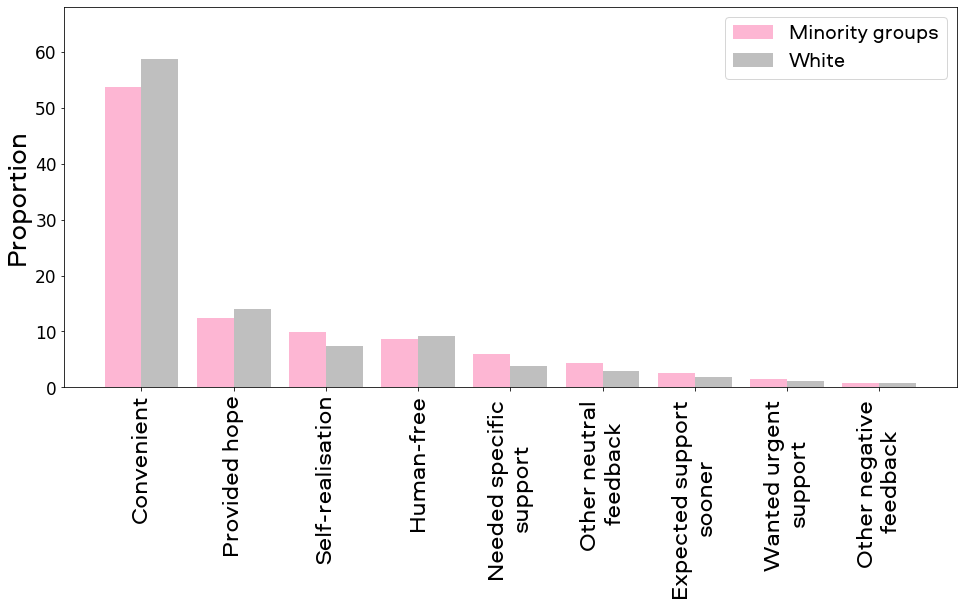

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# get the unique label names
label_names = proportions_ethnicity_2['label_name'].unique()

# create a list to hold the data for each label
data_list = []

# iterate through each label_name and extract the data for minority and majority
for label_name in label_names:
    
    # get the data for this label_name
    data = proportions_ethnicity_2[proportions_ethnicity_2['label_name'] == label_name]
    
    # group the data by broad_ethnicity and sum the proportions
    grouped = data.groupby('ethnicity_grouped_3')['proportion'].sum()
    
    # extract the minority and majority values from the grouped data
    minority_value = grouped['Minority groups']
    majority_value = grouped['White']
    
    # add the values to the data list
    data_list.append((minority_value, majority_value))

# create a numpy array to hold the data
data_array = np.array(data_list)

# create an array of x tick positions
x_ticks = np.arange(len(label_names))

# set the width of the bars
bar_width = 0.4

# create the figure and axes
fig, ax = plt.subplots(figsize=(16, 7))

# create the bars for minority and majority
ax.bar(x_ticks - bar_width/2, data_array[:, 0], width=bar_width, label='Minority groups', color = '#fdb6d3')
ax.bar(x_ticks + bar_width/2, data_array[:, 1], width=bar_width, label='White', color = '#bfbfbf')

# set the x tick positions and labels
ax.set_xticks(x_ticks)
label_names = ['Convenient', 'Provided hope', 'Self-realisation', 'Human-free',
       'Needed specific \nsupport', 'Other neutral \nfeedback',
       'Expected support \nsooner', 'Wanted urgent \nsupport',
       'Other negative \nfeedback']

ax.set_xticklabels(label_names, rotation=90, fontsize=24, font = my_font)


# set the y-axis label to 'Proportion'
ax.set_ylabel('Proportion', fontsize=27, font = my_font)
plt.yticks(fontsize=17)

plt.ylim(0,68)

# add a legend
legend_font = my_font.copy()
legend_font.set_size(20)
ax.legend(prop=legend_font)


# show the plot
plt.show()

#save the plot
image_format = 'png' # e.g .png, .svg, etc.
image_name = folder_figures_save+'qual_feedback_ethnicity_supplement.png'

# fig.savefig(image_name, format=image_format, bbox_inches="tight", dpi=1200)
